# Imports

In [3]:
import matplotlib.pyplot as plt # For visualization

#To create and train the model
import torch
import torch.nn as nn

#For loading in the image data
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Setting the device we are going to use

In [4]:
device = torch.device("cuda")

# Loading in the data

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shrike2005/gender-classification-utk-face-dataset")

print("Path to dataset files:", path)

c:\Users\mkavalio\CodeZone\Machine_Learning_Mary-Kavalionak\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 116M/116M [00:11<00:00, 10.3MB/s] 

Extracting files...


Path to dataset files: C:\Users\mkavalio\.cache\kagglehub\datasets\shrike2005\gender-classification-utk-face-dataset\versions\1


In [8]:
dataset = datasets.ImageFolder(
    root=path, #Location of our data folder
    transform=transforms.ToTensor() #Converts the values in our data into a good format for machine learning
)

In [9]:
dataloader = DataLoader(dataset, batch_size=256, shuffle=True, num_workers=4, prefetch_factor=10) 
# Converts the data we loaded in into batches of 256 examples in each batch

# The Model

In [11]:
model = nn.Sequential(
    nn.Conv2d(3, 64, 3), # Maps important details on the images to create another set of 64 images called features
    nn.ReLU(), # removes negative parts and exentuates important parts of the features
    nn.AdaptiveAvgPool2d(1), # takes the average of each feature as a measure of how prevelant it is
    nn.Flatten(), # converts the averages into a suitable format for the linear layer
    nn.Linear( 64, 2 ), #64 num as an input and 2 as an output 
    # takes all the features and converts them into two predictions for how likely it is a man or a woman
    nn.Softmax(dim=1) # Creates a probability distribution from the output of the linear
) 

# Training the Model

In [12]:
optim = torch.optim.Adam(model.parameters()) # The adam optimizer is a method to train our model which tries to minimize the loss function  
loss_fn = nn.CrossEntropyLoss() # A function to evaluate how well we did on a batch of images
# loss_fn = loss_fn.to(device) # put the loss function on the gpu

In [15]:
train_loss = []
test_loss = []

In [14]:
from tqdm.notebook import tqdm

In [19]:
# alternative code from the lecture
for images, labels in dataloader:
    optim.zero_grad()
    predictions = model(images)
    loss = loss_fn(predictions, labels)
    loss.backward() 
    optim.step()

# was executing for a while


KeyboardInterrupt: 

In [ ]:
for _ in (range(5)): # repeat training several times
    #avg_loss = 0
    epoch_loss = 0 # The cummulated loss over all the batches
    for images, labels in dataloader: # Loop over all batches and take out the images, labels
        #images = images.to(device, non_blocking=True) # Put the images on the gpu
        #labels = labels.to(device, non_blocking=True) # Put the labels on the gpu

        optim.zero_grad() #Reset the optimizer for the next step

        preds = model.forward(images) #Run the images through the model to produce a set of predictions
        loss = loss_fn(preds, labels) # Evaluate the model to see how well it did
        
        loss.backward() # Compute the loss in each layer of the model
        optim.step() # Optimize the model
        
        epoch_loss += loss.item() # add the loss of the current batch to the epoch_loss
        #avg_loss /= len(dataloader) # Calculate the average loss over the epoch
        train_loss.append(epoch_loss/len(dataloader))

In [27]:
type(images)

torch.Tensor

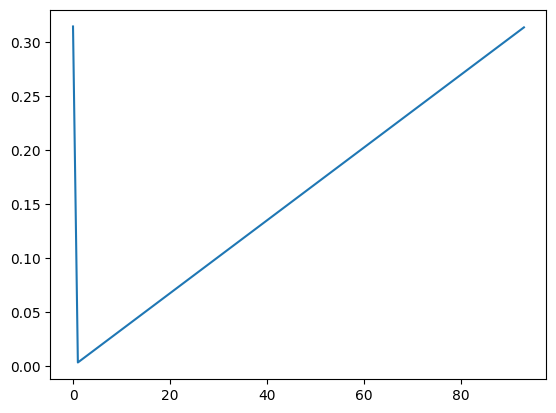

In [29]:
plt.plot(train_loss)

In [31]:
avg_accuracy = 0
for images, labels in dataloader:
    predictions = model(images)
    accuracy = sum(torch.argmax(predictions, dim =1) == labels) / len(images)
    avg_accuracy += accuracy
avg_accuracy /= len(dataloader)
print(avg_accuracy)

tensor(1.)
